# 명나라, 청나라 황제 수명 데이터 분석

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Crawling, R]

# Reference

`-` 명나라 황제 데이터

https://en.wikipedia.org/wiki/List_of_emperors_of_the_Ming_dynasty

`-` 청나라 황제 데이터

https://en.wikipedia.org/wiki/List_of_emperors_of_the_Qing_dynasty

# Crawling

In [2]:
# 필요한 라이브러리를 호출합니다. 존재하지 않으면 설치합니다.
if (!require(rvest)) install.packages('rvest')
library(rvest)

if (!require(tidyverse)) install.packages('tidyverse')
library(tidyverse)

get_kings_info = function(order, nation){ # ex) order = 1, nation = 'Ming' or 'King'
    ming_url = 'https://en.wikipedia.org/wiki/List_of_emperors_of_the_Ming_dynasty'
    qing_url = 'https://en.wikipedia.org/wiki/List_of_emperors_of_the_Qing_dynasty'
    
    target_url = ifelse(nation == 'Ming', ming_url, qing_url)
    dynasty = ifelse(nation == 'Ming', 'Ming', 'Qing')
    
    unclean_table = 
    (target_url %>%
        read_html %>%
        html_nodes('table[class=wikitable]'))[1] %>%
        html_nodes('tbody') %>%
        html_nodes('tr') %>% 
        html_text()

    # 정규표현식을 이용해 양식을 맞춘다
    
    requiredRows_index = str_detect(unclean_table, '[A-Za-z]{5,}\\([0-9]{1,2}\\s[A-Z]{1}')
    requiredRows = unclean_table[requiredRows_index]

    clean_table = gsub('\n', '', requiredRows[order]) %>% 
        strsplit('') %>%
        unlist()

    name_start_index = 1
    name_end_index = grep('\\(', clean_table)[1]-1 # 괄호보다 한 칸 이전에 있으므로 -1
    name = 
        clean_table[name_start_index:name_end_index] %>%
        paste(collapse = '')

    only_numbers = 
        requiredRows[order] %>% # 숫자 존재하는 벡터
        strsplit(split = '[^0-9]') %>%  
        unlist()

    year_index = grep('.{4}', only_numbers)[1:2] # 월, 일은 2글자를 초과하지 못하므로 자연스럽게 네글자만 연도이다.
    year = only_numbers[year_index]
    
    return(c(dynasty, name, year))
}

ming_last_order = 16
qing_last_order = 12

ming_kings_info <- vector('list', ming_last_order)
qing_kings_info <- vector('list', qing_last_order)
for (i in 1:ming_last_order) ming_kings_info[[i]] = get_kings_info(i, 'Ming')
for (i in 1:qing_last_order) qing_kings_info[[i]] = get_kings_info(i, 'Qing')

kings_info = do.call('rbind', c(ming_kings_info, qing_kings_info))
colnames(kings_info) <- c('dynasty', 'name', 'birth', 'death')
write.table(kings_info, 'China_king.txt', row.names = FALSE)

필요한 패키지를 로딩중입니다: rvest

Warning message:
"패키지 'rvest'는 R 버전 4.1.3에서 작성되었습니다"
필요한 패키지를 로딩중입니다: tidyverse

Warning message:
"패키지 'tidyverse'는 R 버전 4.1.3에서 작성되었습니다"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"패키지 'ggplot2'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tibble'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'tidyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'readr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'purrr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'dplyr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'stringr'는 R 버전 4.1.3에서 작성되었습니다"
Warning message:
"패키지 'forcats'는 R 버전 4.1.3에서 작성되었습니다"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter()  

In [4]:
kings_info

dynasty,name,birth,death,age
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Ming,Hongwu Emperor,1328,1398,70
Ming,Jianwen Emperor,1377,1402,25
Ming,Yongle Emperor,1360,1424,64
Ming,Hongxi Emperor,1378,1425,47
Ming,Xuande Emperor,1399,1435,36
Ming,Emperor Yingzong,1427,1464,37
Ming,Jingtai Emperor,1428,1457,29
Ming,Chenghua Emperor,1447,1487,40
Ming,Hongzhi Emperor,1470,1505,35


# Analysis

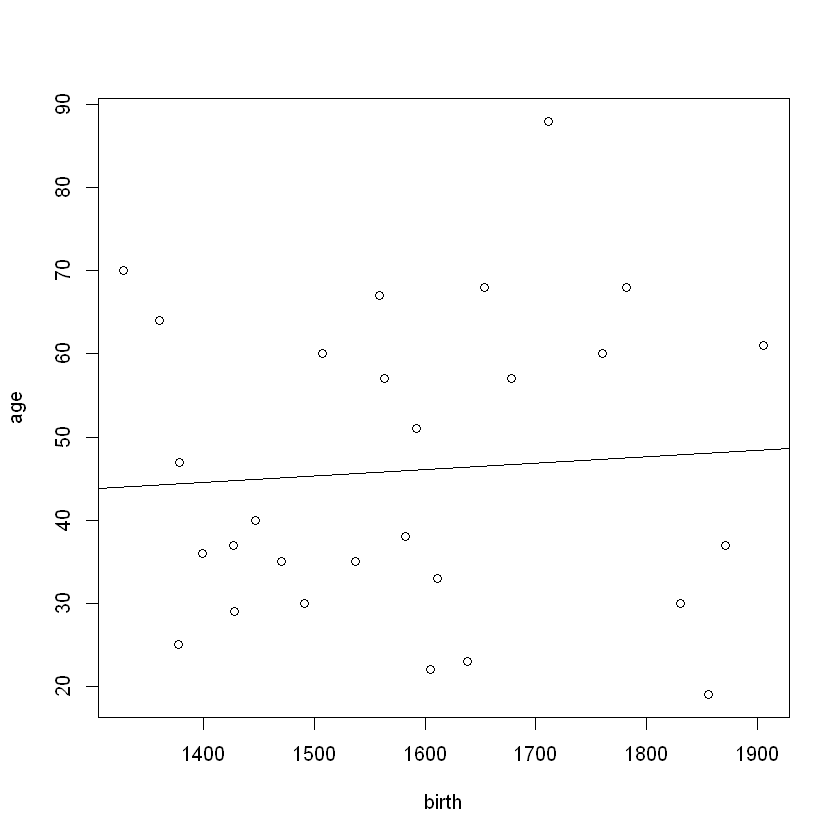

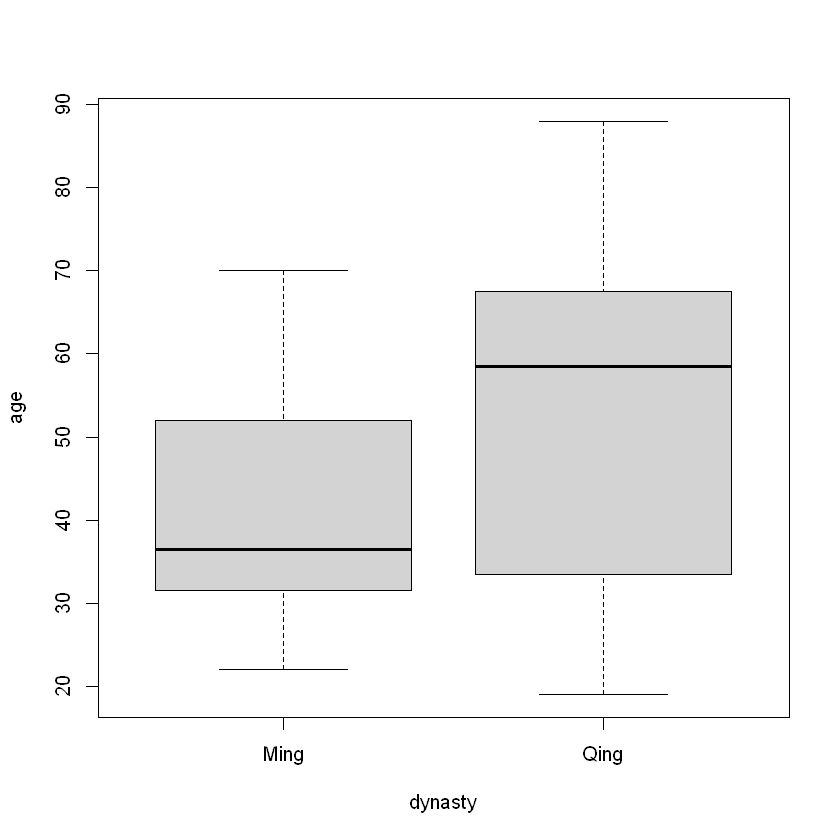

In [3]:
kings_info <- data.frame(kings_info)
kings_info[, c('birth', 'death')] = 
    kings_info[, c('birth', 'death')] %>%
    unlist() %>%
    as.numeric()

kings_info =
    kings_info %>%
    mutate(age = death - birth)

plot(kings_info$birth, kings_info$age,
     xlab = 'birth',
     ylab = 'age')
abline(lm(kings_info$age ~ kings_info$birth))

boxplot(kings_info$age ~ factor(kings_info$dynasty),
        xlab = 'dynasty',
        ylab = 'age')